In [1]:
%matplotlib inline 

import os
import json
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
eng_levels = [-2, -1, 0, 1, 2, 3]

## OpenPose Features

In this analysis, our aim is finding if we can get a relation between engagement and all sounds in the classroom.

In [3]:
features_path = "../pose-action/features/pose_keypoints_with_labels.tsv"

In [4]:
df = pd.read_csv(features_path, header=None, sep="\t")

In [5]:
labels = df.iloc[:, len(df.columns)-1]

In [6]:
df = df.iloc[:, :-1]
df = df.loc[:, (df != 0).any(axis=0)]
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
5652,190.535,257.057,0.872082,118.062,280.659,0.801870,53.4226,290.494,0.713228,90.6386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3943,257.124,198.395,0.911129,204.282,264.952,0.777952,147.3730,274.868,0.744833,141.5500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1690,486.331,206.188,0.836583,474.564,233.651,0.839830,429.6030,241.436,0.881403,402.1670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4607,715.664,180.796,0.904939,746.983,210.210,0.889665,709.6640,210.096,0.843188,666.6170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4074,219.956,241.533,0.878145,196.380,274.886,0.855316,125.8900,276.791,0.721950,106.3230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000,...,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000,6935.000000
mean,521.292876,205.648416,0.899128,520.347441,240.779605,0.864309,472.773408,242.818735,0.814966,453.785817,...,0.014832,1.165959,0.943061,0.000193,1.020329,0.800537,0.000171,2.121755,2.583375,0.000392
std,222.281924,32.120907,0.035747,242.545221,33.978505,0.038177,249.675010,36.139234,0.053843,239.872209,...,0.060221,28.867620,22.279946,0.004643,27.277372,20.361235,0.004444,35.771726,37.553911,0.006165
min,84.830400,18.129600,0.708782,59.317100,61.259300,0.618553,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,400.111500,194.368500,0.873842,384.440000,231.725500,0.837900,344.327500,229.769000,0.783964,321.827500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,490.205000,210.192000,0.898924,474.639000,245.442000,0.866084,431.425000,249.278000,0.825371,409.933000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,698.968500,225.766000,0.925697,733.218000,261.095000,0.890652,695.930000,270.798500,0.852085,672.476000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,983.971000,284.598000,0.990612,995.816000,296.319000,0.956970,952.630000,319.831000,0.923391,899.828000,...,0.422203,817.440000,682.254000,0.146319,821.351000,674.463000,0.150422,856.655000,662.709000,0.215792


In [8]:
labels.value_counts()

 2.0    2812
 1.0    1376
 3.0    1303
 0.0     708
-2.0     494
-1.0     242
Name: 300, dtype: int64

In [9]:
print(len(df), len(labels))

6935 6935


## Reduce with PCA

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_samples = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca.fit(scaled_samples)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.09505704 0.08603   ]
[444.70909348 423.06667903]


In [11]:
principalComponents = pca.fit_transform(scaled_samples)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
principalDf.head()

,pc1,pc2
0,-4.391708,7.958929
1,6.341594,-4.345850
2,-6.295071,1.709713
3,-6.402657,1.669013
4,6.221711,-3.849329


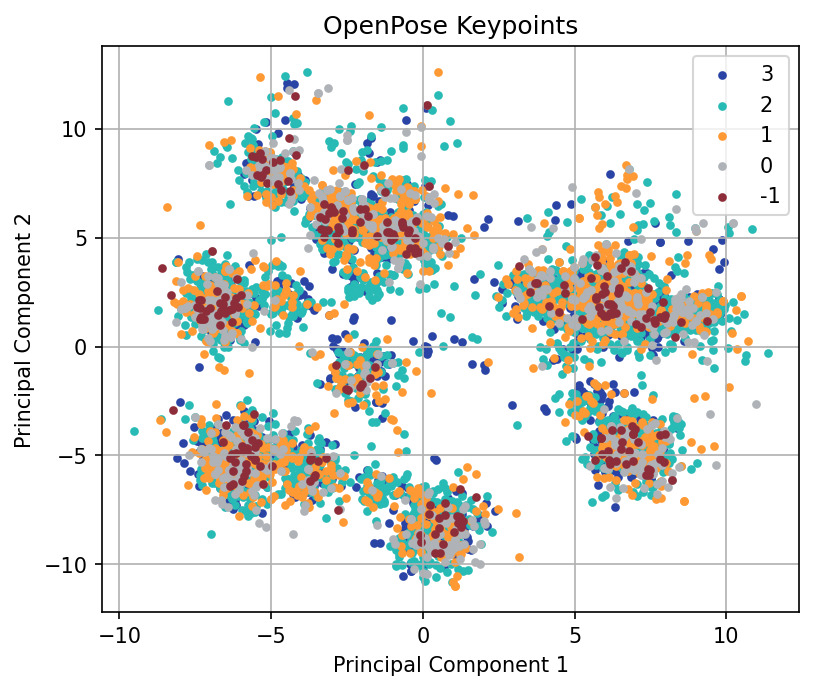

In [12]:
from tueplots import figsizes, fonts
from tueplots.constants.color import palettes

fonts.neurips2021()
plt.rcParams.update({"figure.dpi": 150})


fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title("OpenPose Keypoints")

targets = [3, 2, 1, 0, -1, -2]
colors = palettes.pn[:6]

#targets = [0, 1, 2, 3]
#colors = ['r', 'g', 'b', 'm']


for target, color in zip(targets,colors):
    indicesToKeep = labels.values == target
    ax.scatter(principalDf.loc[indicesToKeep, 'pc1']
               , principalDf.loc[indicesToKeep, 'pc2']
               , color = color
               , s = 10)
ax.legend(targets)
ax.grid()

#plt.xlim([-103400, -103700])
#plt.ylim([0, 1000])

plt.show()
#fig.savefig('fig_voice/%s-PCA.png' % title)

### Correlation

<AxesSubplot:>

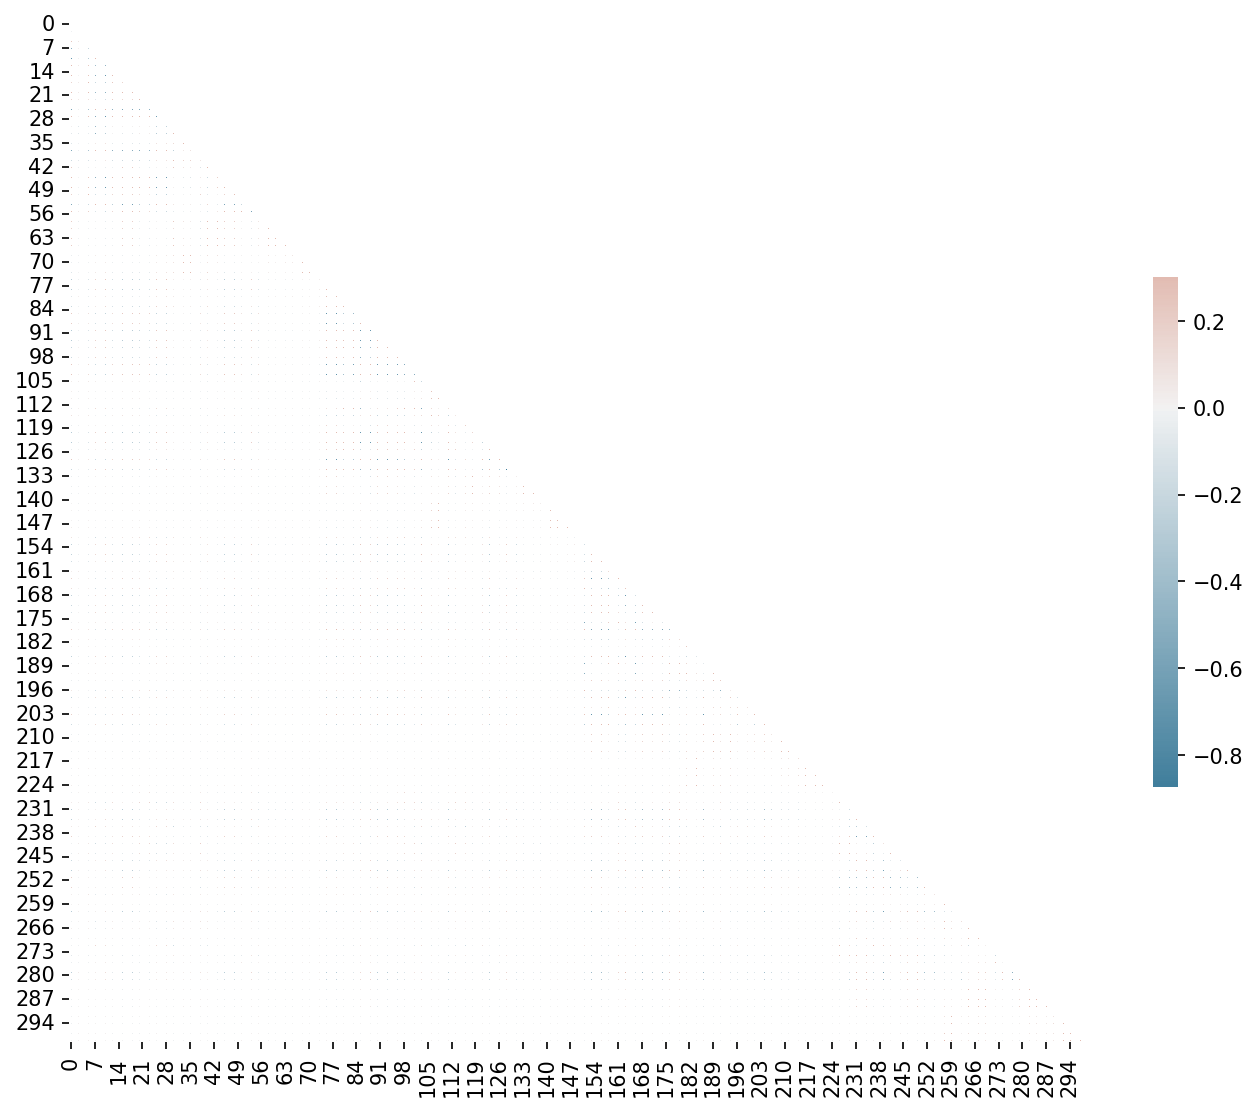

In [13]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#f.savefig('fig/%s-corr.png' % title)

### Profiling

In [20]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="OpenPose Profiling Report",
                        minimal=True,
                        correlations={
                            "pearson": {"calculate": True},
                            "spearman": {"calculate": False},
                            "kendall": {"calculate": True},
                            "phi_k": {"calculate": False},
                        })

In [21]:
#profile.to_widgets()
#profile.to_notebook_iframe()
profile.to_file("./pose-profiling-report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]